**Assignment Overview**

In this assignment, you will perform a series of task (explained in section 3) for Regression and Classification
for a dataset and provide a rigorous rationale for your solutions. We will determine scores by judging both
the soundness and cleanliness of your code, the quality of the write-up(report) and your ability to answer
the question during viva. Here are examples of aspects that may lead to point deductions:
• Use of misleading, unnecessary, or unmotivated graphic elements.
• Unreadable code.
• Missing or incomplete design rationale in write-up.
• Ineffective encoding for your stated goal (e.g., distracting colors, improper data transformation).



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3.1.1 Choose; Load; Inspect and Explore your Data [5].
• Pick a Domain and Dataset you are interested in:
For this assignment, you will need to find a dataset of your choosing (interest) and load into dataframe
object with PANDAS library.

Perform a initial observation regarding the dataset, while doing that try to answer following question:
1. When and Who created the dataset?
2. How did you get acess to the dataset?
3. List out the attributes (columns) of a dataset.

• Load;Inspect and Explore your Data:
Understanding the characteristics of Data beforehand allow us to build a better model with acceptable
performance. Before you begin the quest of building, training and testing of model, You must write
some code in chunks to check, preview, summarize, explore and visualize your data.

1. Load and Check the dataset: After loading the data, it is a good practise to run some checks on
it. You must perform the following:
(a) Data Cleaning and find the summary statistics of the data.
(b) Explore the data with Visualization and chart.

3.1.2 Build Primary Model [5]
Once you have assembled your dataset and gained insights into the key characteristics of your data, it’s time
to Build; Train; and Evaluate your model. For this task you must do the following:
1. Split the Dataset into Train and Test set.
2. Built at least two machine learning model for Regression Task.
3. Evaluate both model on Test Dataset.
4. Conclude: Which Model best performed in your dataset?

3.1.3 Hyper-parameter Optimization with Cross-Validation.[2.5]
Hyper-parameter optimization (aka Hyper-parameter Tuning) is the process of finding the best hyperparameters value for your selected model. In this step you must perform the following:
1. Identify the various hyper-parameters of the model you used in section 3.1.2 {For both the model}.
2. Used any cross-validation techniques to find the best value of hyper-parameters selected above. {Hint:
You can use grid searchCV or randomized searchCV.
3. Conclude: The best Hyper-parameters for both the model.

3.1.4 Feature Selection [2.5]:
In this section you must any one of the feature selection technique discussed on Week-11 Tutorial to select
and identify the best features.
3.1.5 Final Model [2.5]:
With the best Hyper-parameters from section 3.1.3 and selected features from 3.1.4.rebuild both the model
from section 3.1.2

Conclusion [2.5]:
Please write a brief summary about the outcomes of your experiment. You can explain the following questions:
1. What was your model performance in section 3.1.3.?
2. Did any of the methods you applied {Cross Validation and Feature selection} increased or
decreased.
3. What did you learn and what could be the future direction?

***THE MODELS CREATED ARE FOR CLASSIFICATION***

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

datasetUrl = "/content/drive/MyDrive/final/sentimentdataset.csv"
df = pd.read_csv(datasetUrl, delimiter=',')

print("\nColumn Names:\n",df.columns.tolist(),"\n")


Mounted at /content/drive

Column Names:
 ['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'] 



In [ ]:
# Data Cleaning

df.drop(columns='Unnamed: 0.1', inplace=True)
df.rename(columns={'Unnamed: 0':'Id'}, inplace=True)

df.head(2)

df.isnull().sum()

df.dtypes

timestamp_columns = ['Timestamp', 'Year', 'Month', 'Day', 'Hour']

for column in timestamp_columns:
  df[column]= pd.to_datetime(df[column])

object_columns = df.select_dtypes('object').columns.to_list()

for column in object_columns:
  df[column]=df[column].astype(str).str.strip()

df.head(1)

print('Column Data Types: \n',df.dtypes,'\n')

Column Data Types: 
 Id                    int64
Text                 object
Sentiment            object
Timestamp    datetime64[ns]
User                 object
Platform             object
Hashtags             object
Retweets            float64
Likes               float64
Country              object
Year         datetime64[ns]
Month        datetime64[ns]
Day          datetime64[ns]
Hour         datetime64[ns]
dtype: object 



In [ ]:
# Summary Statistics

summary_statistics = df.describe(include=[np.float64])
print('Numeric Columns Summary Statistics: \n',summary_statistics,'\n')

non_numeric_summary = df.describe(include='O')
print('Non-Numeric Columns Summary Statistics: \n',non_numeric_summary,'\n\n')

Numeric Columns Summary Statistics: 
          Retweets       Likes
count  732.000000  732.000000
mean    21.508197   42.901639
std      7.061286   14.089848
min      5.000000   10.000000
25%     17.750000   34.750000
50%     22.000000   43.000000
75%     25.000000   50.000000
max     40.000000   80.000000 

Non-Numeric Columns Summary Statistics: 
                                                      Text Sentiment  \
count                                                 732       732   
unique                                                706       191   
top     A compassionate rain, tears of empathy falling...  Positive   
freq                                                    3        45   

                 User   Platform                    Hashtags Country  
count             732        732                         732     732  
unique            670          3                         692      33  
top     ForestDreamer  Instagram  #Playful #CarnivalEscapade     USA  
freq    

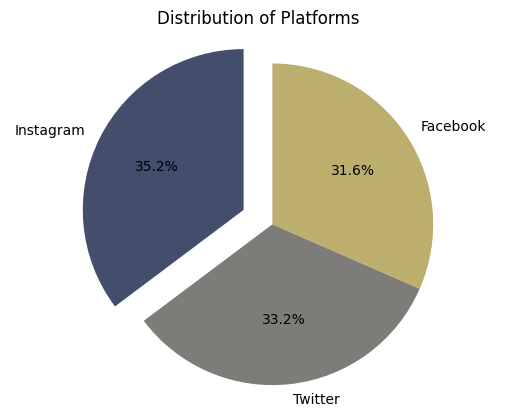

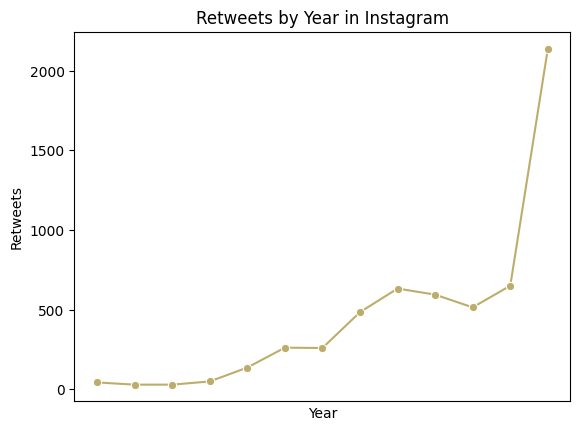

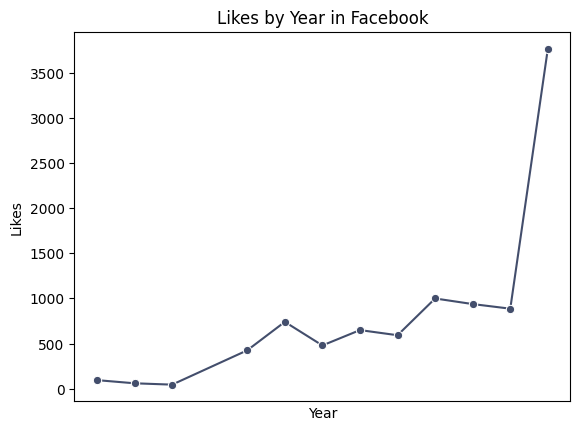

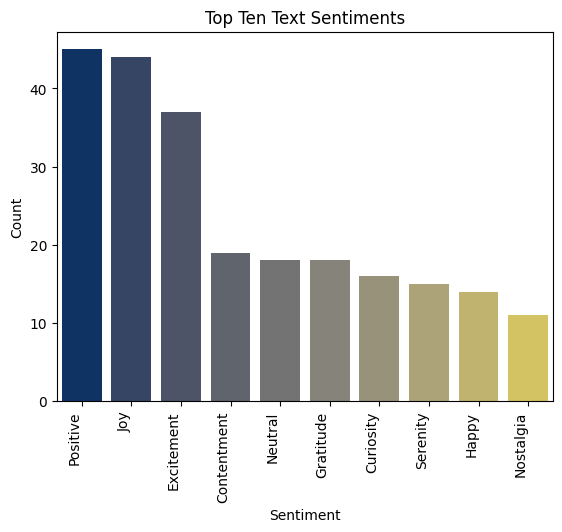

Top Hashtags: 
 ['#Playful #CarnivalEscapade', '#Hopeful #SeedsOfOptimism', '#Proud #ScalingPeaks', '#Compassionate #TearsOfEmpathy', '#Numbness #EmotionalShield', '#Acceptance #LifeJourney', '#Curiosity #AncientMysteries', '#Frustrated #MosaicOfDisappointment', '#Confusion #ThoughtLabyrinth', '#Inspired #TalesToTheStars'] 



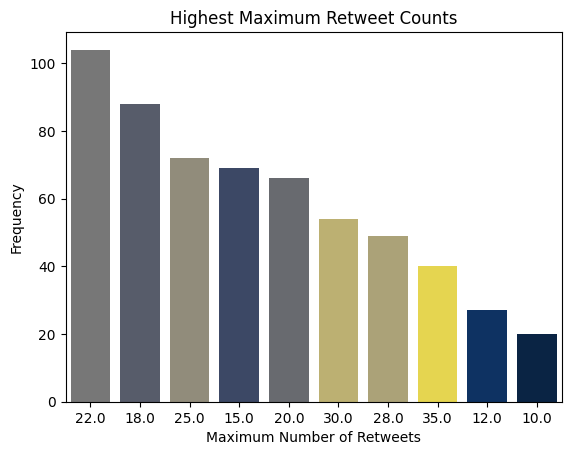

In [ ]:
# Exploration with Visualization and Charts

explode = (0.2, 0, 0)
colors = sns.color_palette('cividis', len(df['Platform'].unique()))  # Use Seaborn color palette
plt.pie(df['Platform'].value_counts(), autopct='%1.1f%%', explode=explode, labels=df['Platform'].value_counts().index, colors=colors, startangle=90)
plt.axis('equal')
plt.title('Distribution of Platforms')
plt.show()

instragram=df[df['Platform']=='Instagram']
i=instragram.groupby('Year')['Retweets'].sum().reset_index()
sns.lineplot(data=i, x="Year", y='Retweets', marker='o', color='#bdad6c')
plt.title('Retweets by Year in Instagram')
plt.show()

facebook=df[df['Platform']=='Facebook']
f=facebook.groupby('Year')['Likes'].sum().reset_index()
sns.lineplot(data=f, x="Year", y='Likes', marker='o', color='#434e6c')
plt.title('Likes by Year in Facebook')
plt.show()

sentiment_counts= df['Sentiment'].value_counts().nlargest(10)
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='cividis',legend=False, dodge=False, hue=sentiment_counts.index)
plt.title("Top Ten Text Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='right')
plt.show()

top_hashtags = df['Hashtags'].value_counts().nlargest(10).index.tolist()
print('Top Hashtags: \n', top_hashtags, '\n')

hashtag_retweet_counts = df.groupby('Hashtags')['Retweets'].max().value_counts().nlargest(10).sort_values(ascending=False)
sns.barplot(x=hashtag_retweet_counts.index, y=hashtag_retweet_counts.values, palette='cividis', legend=False, dodge=False, hue=hashtag_retweet_counts.index,order=hashtag_retweet_counts.index)
plt.xlabel('Maximum Number of Retweets')
plt.ylabel('Frequency')
plt.title('Highest Maximum Retweet Counts')
plt.show()

In [ ]:
# Building Primary Model

print("\nBuilding Primary Classification Model \n")

X_train, X_test , y_train, y_test= train_test_split(df['Text'], df['Sentiment'],test_size=.2, random_state=42)
print('Training Data Length:',len(X_train),' Test Data Length:',len(X_test),'\n')


Building Primary Classification Model 

Training Data Length: 585  Test Data Length: 147 



In [ ]:
# Count Vectorization

v = CountVectorizer()
matrix = v.fit_transform(X_train)

In [ ]:
# Random Forest Classification Model Training
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(matrix, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# SVC Model Training

model2 = SVC(C=1, kernel='rbf', gamma='scale')
model2.fit(matrix,y_train)

SVC(C=1)

In [ ]:
# Model Evaluation on Test Data

test_matrix = v.transform(X_test)
y_pred1=model1.predict(test_matrix)
y_pred2=model2.predict(test_matrix)

from sklearn.metrics import accuracy_score, precision_score
accuracy_rf = accuracy_score(y_test, y_pred1)
accuracy_svc = accuracy_score(y_test, y_pred2)
print("Random Forest Classifier Accuracy:", accuracy_rf)
print("SVC Accuracy:", accuracy_svc)

Random Forest Classifier Accuracy: 0.38095238095238093
SVC Accuracy: 0.1836734693877551


In [ ]:
# Hyper Parameter Optimization with Cross Validation

print("\nRandom Search with Cross Validation for Random Forest Classifier\n")

print("Commonly tuned parameters for Random Forest Classifier:\nn_estimators\nmax_depth\nmin_samples_split\nmin_samples_leaf\n")

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import warnings

param_dist_rf = {
    'n_estimators': [50,100,150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,3,5]
}
warnings.filterwarnings("ignore")

rf_model = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search_rf.fit(matrix, y_train)

print("Best Parameters for RandomForestClassifier (Randomized Search):", random_search_rf.best_params_)
print("Best Accuracy:", random_search_rf.best_score_)
print("\nRandom Search with Cross Validation for SVC\n")

print("Commonly tuned parameters for SVC:\nC\nkernel\ngamma\n")

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
import warnings

param_dist_svc = {
    'C': reciprocal(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

warnings.filterwarnings("ignore")

svc_model = SVC(random_state=42)

random_search_svc = RandomizedSearchCV(estimator=svc_model, param_distributions=param_dist_svc, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search_svc.fit(matrix, y_train)

print("Best Parameters for RandomForestClassifier (Randomized Search):", random_search_svc.best_params_)
print("Best Accuracy:", random_search_svc.best_score_)


Random Search with Cross Validation for Random Forest Classifier

Commonly tuned parameters for Random Forest Classifier:
n_estimators
max_depth
min_samples_split
min_samples_leaf

Best Parameters for RandomForestClassifier (Randomized Search): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best Accuracy: 0.4837606837606838

Random Search with Cross Validation for SVC

Commonly tuned parameters for SVC:
C
kernel
gamma

Best Parameters for RandomForestClassifier (Randomized Search): {'C': 2.9106359131330697, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.3965811965811966


In [ ]:
# Feature Selection

print("\nFeature Selection using TF-IDF and chi squared test\n")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

k_best = 1000
X_train_tfidf_selected = SelectKBest(chi2, k=k_best).fit_transform(X_train_tfidf, y_train)




Feature Selection using TF-IDF and chi squared test



In [ ]:
print("\nRebuilding Model from best parameters and feature selection \n")

x_train_selected, x_test_selected, y_train, y_test = train_test_split(X_train_tfidf_selected, y_train, test_size=0.2, random_state=42)

# Random Forest Classification Model with Best Parameters

recalibrated_model1 = RandomForestClassifier(n_estimators=132, random_state=42, max_depth=None, min_samples_leaf=1)
recalibrated_model1.fit(x_train_selected, y_train)

# SVC Model Training Model with Best Parameters

recalibrated_model2 = SVC(C=2.9106359131330697, kernel='linear', gamma='scale')
recalibrated_model2.fit(x_train_selected,y_train)

recalibrated_y_pred1=recalibrated_model1.predict(x_test_selected)
recalibrated_y_pred2=recalibrated_model2.predict(x_test_selected)

# Recalibrated Model Accuracy
recalibrated_accuracy_rf = accuracy_score(y_test, recalibrated_y_pred1)
recalibrated_accuracy_svc = accuracy_score(y_test, recalibrated_y_pred2)
print("Random Forest Classifier Accuracy:", recalibrated_accuracy_rf)
print("SVC Accuracy:", recalibrated_accuracy_svc)


Rebuilding Model from best parameters and feature selection 

Random Forest Classifier Accuracy: 0.42735042735042733
SVC Accuracy: 0.3162393162393162
